In [1]:
import flowpm

/Users/jsull/anaconda3/envs/flowpm_p/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jsull/anaconda3/envs/flowpm_p/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jsull/anaconda3/envs/flowpm_p/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jsull/anaconda3/envs/flowpm_p/lib

the mininal working example, let's check it still works with and without short range

In [2]:
%pylab inline
from flowpm import linear_field, lpt_init, nbody, cic_paint
import tensorflow as tf
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline

klin = np.loadtxt('../flowpm/data/Planck15_a1p00.txt').T[0]
plin = np.loadtxt('../flowpm/data/Planck15_a1p00.txt').T[1]

ipklin = iuspline(klin, plin)

Populating the interactive namespace from numpy and matplotlib


In [3]:
stages = np.linspace(0.1, 1.0, 10, endpoint=True)
initial_conditions = flowpm.linear_field(16,#32,          # size of the cube
                                         100,         # Physical size of the cube
                                         ipklin,      # Initial powerspectrum
                                         batch_size=1,seed=1)

# Sample particles
state = flowpm.lpt_init(initial_conditions, a0=0.1)   

# Evolve particles down to z=0
final_state = flowpm.nbody(state, stages, 16)         

# Retrieve final density field
final_field = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state[0])

with tf.Session() as sess:
    state_l = sess.run(final_state)
    sim_l = sess.run(final_field)




dbug max LR force is 0.12719572
min x=15.26157283782959, max x=-0.18888592720031738, step a=0.1
dbug max LR force is 0.26592335
min x=15.473228454589844, max x=-0.3603716492652893, step a=0.2
dbug max LR force is 0.43192926
min x=15.675090789794922, max x=-0.49957799911499023, step a=0.30000000000000004
dbug max LR force is 0.5792248
min x=15.879549980163574, max x=-0.6212289333343506, step a=0.4
dbug max LR force is 0.63769996
min x=16.079254150390625, max x=-0.7297645807266235, step a=0.5
dbug max LR force is 0.7419613
min x=16.26658058166504, max x=-0.8266890048980713, step a=0.6
dbug max LR force is 0.8156342
min x=16.433490753173828, max x=-0.9128966331481934, step a=0.7000000000000001
dbug max LR force is 0.94337595
min x=16.578140258789062, max x=-0.9891715049743652, step a=0.8
dbug max LR force is 0.9421703
min x=16.701627731323242, max x=-1.0563503503799438, step a=0.9
dbug max LR force is 1.058857


In [4]:
#Try the short range
# Evolve particles down to z=0
final_state_s = flowpm.nbody(state, stages, 16,short_range=True,cm_scale=1,eps_s=.1)         

# Retrieve final density field
final_field_s = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state_s[0])

with tf.Session() as sess:
    state_s= sess.run(final_state_s)
    sim_s= sess.run(final_field_s)


dbug max LR force is 0.12719572
Cmcells shape (4096, 3)
bin size 1.0
num_bins_1d 16
xeval shape (1, 4096, 3)
eta [0.1        0.02031695 0.1        ... 0.02058046 0.02058046 0.02058046]
zeta [-0.1         0.00010639 -0.1        ...  0.00010639  0.00010639
  0.00010639]
global min eta 0.00037412270631429265
global max eta 0.19291955449369233
global min zeta -0.1
global max zeta 0.0003504602471366525
bin distr summary (for rough idea of load balance): min=0, max=7, mean=1.00, median=1.0, total/expected_total=1.0
dbug max SR force is 5.6139503
min x=15.26157283782959, max x=-0.18888592720031738, step a=0.1
dbug max LR force is 0.25332573
Cmcells shape (4096, 3)
bin size 1.0
num_bins_1d 16
xeval shape (1, 4096, 3)
eta [0.1        1.83612661 1.83612661 ... 1.90758142 1.83612661 0.1       ]
zeta [-0.1         0.06124598  0.06124598 ...  0.02688575  0.06124598
 -0.1       ]
global min eta 0.0015145167640966308
global max eta 5.285358631746335
global min zeta -0.1
global max zeta 0.212772703170

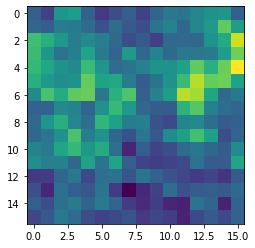

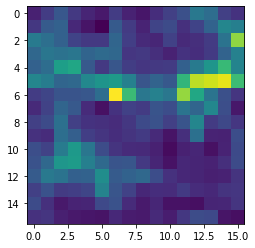

15.16433 0.00046288967


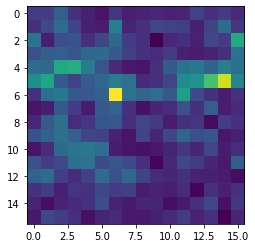

In [5]:

#visually comparing one-step fields
imshow(sim_s[0].sum(axis=0))
plt.show()

imshow(sim_l[0].sum(axis=0))
plt.show()

#L2 MSE
l2mse = np.sqrt(((sim_l[0]-sim_s[0])**2))
imshow(l2mse.sum(axis=0))
print(l2mse.max(),l2mse.min())
#pretty awful, looks like it just subtracting uniform background
#no it is slightly better than that, it looks more like  subtracting a diffused version of the long-range
#the diffusion is occuring because of the 2-body interaction time from high accelerations due to nearby particles
#because timestep is too short...


In [6]:
%%time
LL = []
for i in range(8**3):
    LL.append(5)
    

CPU times: user 67 µs, sys: 0 ns, total: 67 µs
Wall time: 70.8 µs


In [7]:
def speed_check():
    LL = []
    for i in range(8**3):
        LL.append(tf.constant([5]))
        
    return LL

In [8]:
%%time
with tf.Session() as sess:
    ll = sess.run(speed_check())
    

CPU times: user 1.11 s, sys: 27 ms, total: 1.13 s
Wall time: 1.14 s


In [ ]:
#calling tensorflow in the loops is a big problem...